In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import Bedretto M0 experiment provisional dataset 
catalog = pd.read_csv('seiscomp-exp-dd_20240415.csv')
catalog_xyz = catalog[['x', 'y', 'z']]
X = catalog_xyz.to_numpy()

In [4]:
import gudhi as gd
import matplotlib.pyplot as plt

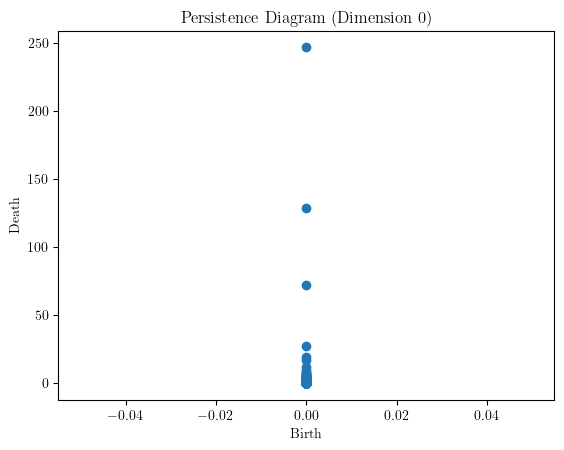

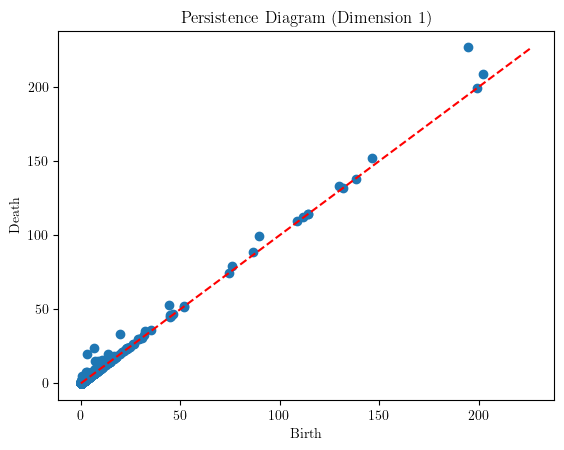

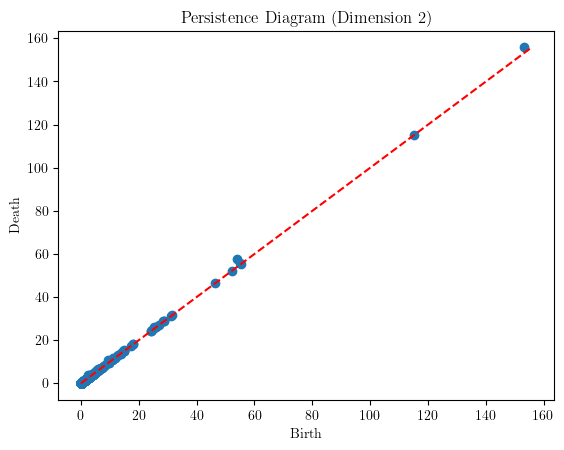

In [15]:
# Create an AlphaComplex from the 3D data points
alpha_complex = gd.AlphaComplex(points=X)

# Create a simplex tree for the Alpha Complex
simplex_tree = alpha_complex.create_simplex_tree()

# Compute the persistence of the simplicial complex
simplex_tree.compute_persistence()

# Retrieve the persistence intervals
persistence_intervals = simplex_tree.persistence()

# Helper function to plot persistence diagrams for specific dimensions
def plot_persistence_diagram(persistence_intervals, dimension):
    intervals = [p for p in persistence_intervals if p[0] == dimension]
    plt.figure()
    plt.scatter([birth for dim, (birth, death) in intervals],
                [death for dim, (birth, death) in intervals])
    plt.plot([0, max([death for dim, (birth, death) in intervals])], 
             [0, max([death for dim, (birth, death) in intervals])], 'r--')
    plt.xlabel("Birth")
    plt.ylabel("Death")
    plt.title(f"Persistence Diagram (Dimension {dimension})")
    plt.show()

# Plot persistence diagrams for dimensions 0, 1, and 2
plot_persistence_diagram(persistence_intervals, 0)
plot_persistence_diagram(persistence_intervals, 1)
plot_persistence_diagram(persistence_intervals, 2)

In [16]:
orth = pd.read_csv('toy-orthogonal.csv')
X_orth = orth[['x', 'y', 'z']].values
clusters_orth = orth['cluster'].values

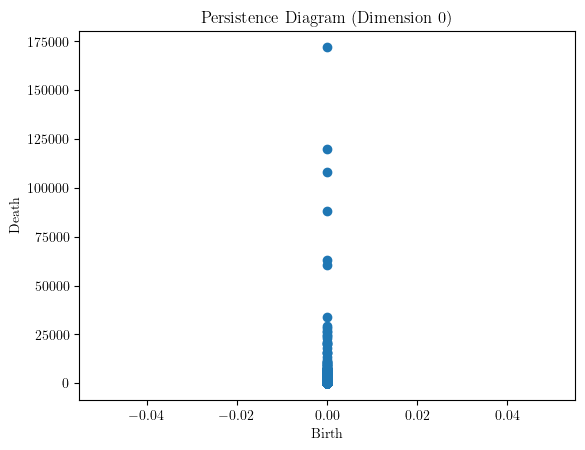

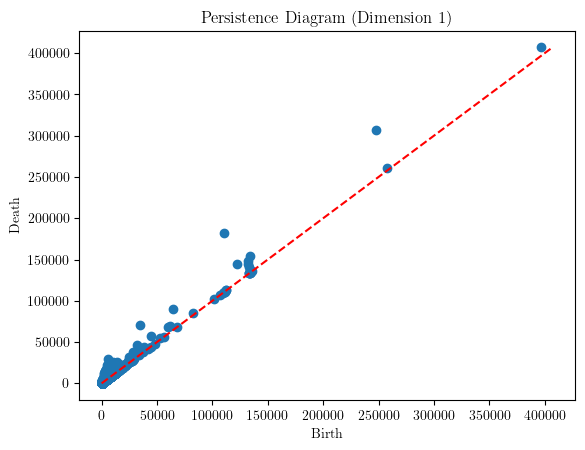

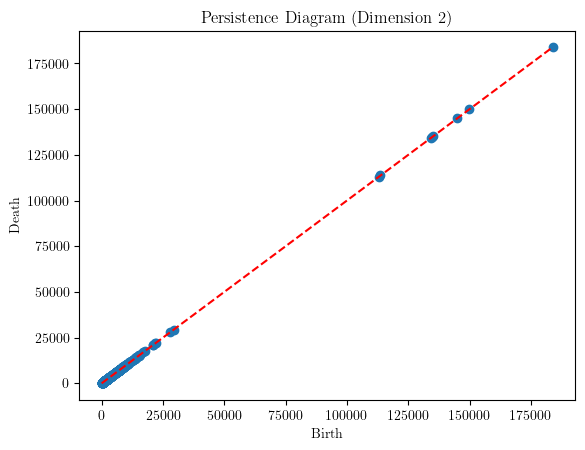

In [17]:
# Create an AlphaComplex from the 3D data points
alpha_complex = gd.AlphaComplex(points=X_orth)

# Create a simplex tree for the Alpha Complex
simplex_tree = alpha_complex.create_simplex_tree()

# Compute the persistence of the simplicial complex
simplex_tree.compute_persistence()

# Retrieve the persistence intervals
persistence_intervals = simplex_tree.persistence()

# Helper function to plot persistence diagrams for specific dimensions
def plot_persistence_diagram(persistence_intervals, dimension):
    intervals = [p for p in persistence_intervals if p[0] == dimension]
    plt.figure()
    plt.scatter([birth for dim, (birth, death) in intervals],
                [death for dim, (birth, death) in intervals])
    plt.plot([0, max([death for dim, (birth, death) in intervals])], 
             [0, max([death for dim, (birth, death) in intervals])], 'r--')
    plt.xlabel("Birth")
    plt.ylabel("Death")
    plt.title(f"Persistence Diagram (Dimension {dimension})")
    plt.show()

# Plot persistence diagrams for dimensions 0, 1, and 2
plot_persistence_diagram(persistence_intervals, 0)
plot_persistence_diagram(persistence_intervals, 1)
plot_persistence_diagram(persistence_intervals, 2)

In [19]:
# Compute persistent homology
pers = simplex_tree.persistence()

# Extract 1-simplices (edges) from the simplex tree
edges = simplex_tree.get_skeleton(1)  # List of edges, where each edge is a tuple of vertex indices

# Create a mapping of edge indices for easier lookup
edge_dict = {tuple(sorted(edge)): idx for idx, edge in enumerate(edges)}

# Extract persistent features (1D) with significant persistence
threshold = 0.5
persistent_features = [(p[0], p[1]) for p in pers if p[1] - p[0] > threshold]

# Create a mapping from persistence features to edges
feature_to_edge = {}

# Find and map persistent features to edges
for feature in persistent_features:
    birth, death = feature

    # Iterate over edges to find those with similar persistence
    for edge, idx in edge_dict.items():
        # Calculate the persistence of the edge
        intervals = simplex_tree.persistence([edge])
        if intervals:
            simplex_birth = intervals[0][1]
            simplex_death = intervals[0][2]
            
            if np.isclose(birth, simplex_birth, atol=0.1) and np.isclose(death, simplex_death, atol=0.1):
                feature_to_edge[feature] = edge
                break

# Plot 3D Data and persistent edges
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o')

# Add persistent edges to the plot
for feature, edge in feature_to_edge.items():
    start, end = edge
    ax.plot([data[start, 0], data[end, 0]], 
            [data[start, 1], data[end, 1]], 
            [data[start, 2], data[end, 2]], 
            'r-', lw=2, label='Persistent Edge')

plt.title("3D Visualization with Persistent Features")
plt.legend()
plt.show()

TypeError: '<' not supported between instances of 'float' and 'list'

## Dummy 1 plane

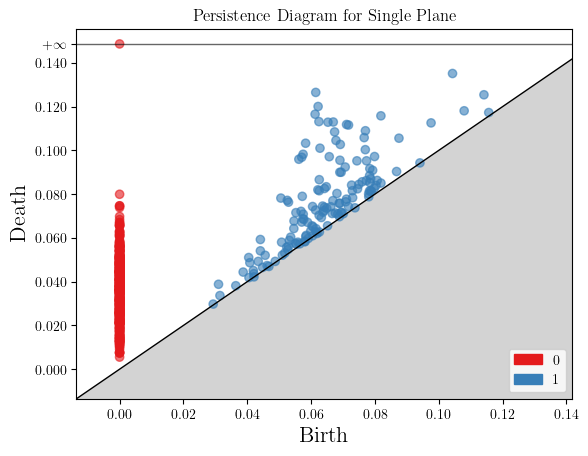

In [40]:
# Generate synthetic point cloud data for a single plane
def generate_single_plane(num_points=500, noise=0.02):
    plane = np.random.rand(num_points, 2) - 0.5
    plane = np.hstack((plane, np.zeros((num_points, 1))))  # Add a zero column to represent the Z dimension
    
    points = plane
    points += noise * np.random.randn(*points.shape)
    return points

# Generate point cloud
single_plane_points = generate_single_plane()

# Create Vietoris-Rips complex for the single plane
rips_complex_single_plane = gd.RipsComplex(points=single_plane_points, max_edge_length=0.3)
simplex_tree_single_plane = rips_complex_single_plane.create_simplex_tree(max_dimension=2)

# Compute persistence diagram for the single plane
diag_single_plane = simplex_tree_single_plane.persistence()

# Plot persistence diagram for the single plane
gd.plot_persistence_diagram(diag_single_plane)
plt.title('Persistence Diagram for Single Plane')
plt.show()

## Dummy data test (two intersecting planes)

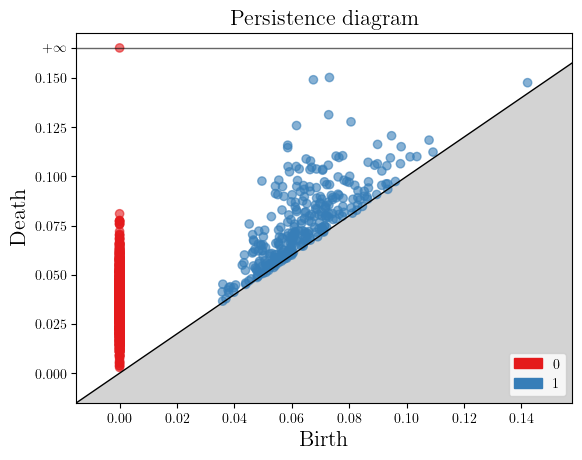

In [42]:

# Generate synthetic point cloud data for two intersecting planes
def generate_intersecting_planes(num_points=500, noise=0.02):
    plane1 = np.random.rand(num_points, 2) - 0.5
    plane1 = np.hstack((plane1, np.zeros((num_points, 1))))
    
    plane2 = np.random.rand(num_points, 2) - 0.5
    plane2 = np.hstack((np.zeros((num_points, 1)), plane2))
    
    points = np.vstack((plane1, plane2))
    points += noise * np.random.randn(*points.shape)
    return points

# Generate point cloud
points = generate_intersecting_planes()

# Create Vietoris-Rips complex
rips_complex = gd.RipsComplex(points=points, max_edge_length=0.3)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence diagram
diag1 = simplex_tree.persistence()

# Plot persistence diagram
gd.plot_persistence_diagram(diag1)
plt.show()

## Dummy dataset : 2 small parallel planes intersecting large plane

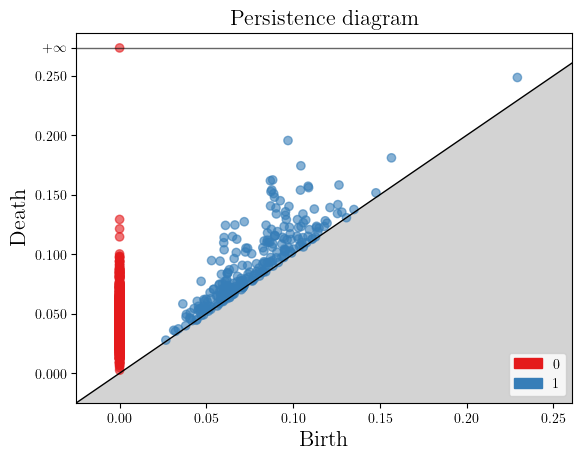

In [43]:
# Generate synthetic point cloud data for one large plane and two small parallel planes
def generate_planes_with_intersections(num_points=500, noise=0.02):
    # Large plane
    large_plane = np.random.rand(num_points, 2) - 0.5
    large_plane = np.hstack((large_plane, np.zeros((num_points, 1))))
    
    # Small planes (parallel to each other and intersecting the large plane)
    small_plane1 = np.random.rand(num_points // 2, 2) - 0.25
    small_plane1 = np.hstack((np.zeros((num_points // 2, 1)), small_plane1 + 0.5))
    
    small_plane2 = np.random.rand(num_points // 2, 2) - 0.25
    small_plane2 = np.hstack((np.zeros((num_points // 2, 1)), small_plane2 - 0.5))
    
    points = np.vstack((large_plane, small_plane1, small_plane2))
    points += noise * np.random.randn(*points.shape)
    return points

# Generate point cloud
points = generate_planes_with_intersections()

# Create Vietoris-Rips complex
rips_complex = gd.RipsComplex(points=points, max_edge_length=0.3)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence diagram
diag2 = simplex_tree.persistence()

# Plot persistence diagram
gd.plot_persistence_diagram(diag2)
plt.show()

In [49]:
# Compute Bottleneck distance
def bottleneck_distance(diag1, diag2):
    return gd.bottleneck_distance(diag1, diag2)

# Separate into H0 and H1 features
h0_features_1 = [entry[1] for entry in diag1 if entry[0] == 0]
h1_features_1 = [entry[1] for entry in diag1 if entry[0] == 1]
# Separate into H0 and H1 features
h0_features_2 = [entry[1] for entry in diag2 if entry[0] == 0]
h1_features_2 = [entry[1] for entry in diag2 if entry[0] == 1]

distance0 = bottleneck_distance(h0_features_1, h0_features_2)
print("Bottleneck Distance for H0 features:", distance0)
distance1 = bottleneck_distance(h1_features_1, h1_features_2)
print("Bottleneck Distance for H1 features:", distance1)

Bottleneck Distance for H0 features: 0.04817904376037789
Bottleneck Distance for H1 features: 0.04522677284596088


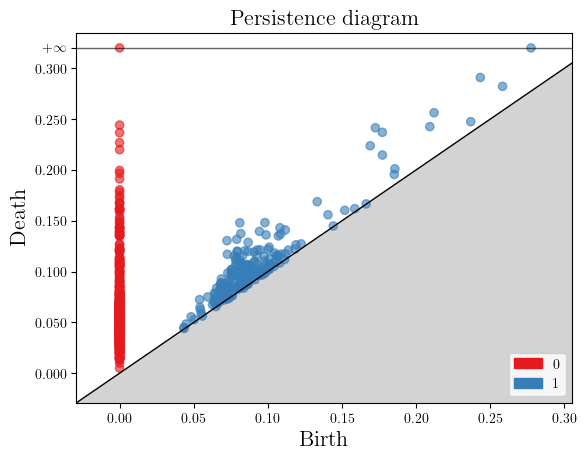

In [36]:
# Adjust the number of points and noise level
def generate_planes_with_intersections(num_points=500, noise=0.05):
    # Large plane
    large_plane = np.random.rand(num_points, 2) - 0.5
    large_plane = np.hstack((large_plane, np.zeros((num_points, 1))))
    
    # Smaller small planes (fewer points)
    small_plane1 = np.random.rand(num_points // 10, 2) - 0.25
    small_plane1 = np.hstack((np.zeros((num_points // 10, 1)), small_plane1 + 0.5))
    
    small_plane2 = np.random.rand(num_points // 10, 2) - 0.25
    small_plane2 = np.hstack((np.zeros((num_points // 10, 1)), small_plane2 - 0.5))
    
    points = np.vstack((large_plane, small_plane1, small_plane2))
    points += noise * np.random.randn(*points.shape)
    return points

# Generate point cloud with increased noise and fewer points for small planes
points = generate_planes_with_intersections()

# Create Vietoris-Rips complex
rips_complex = gd.RipsComplex(points=points, max_edge_length=0.3)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence diagram
diag = simplex_tree.persistence()

# Plot persistence diagram
gd.plot_persistence_diagram(diag)
plt.show()

# Dummy ML workflow

In [39]:
import numpy as np
import gudhi as gd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate a point cloud dataset
def generate_planes_with_intersections(num_large_points=1000, num_small_planes=10, small_points_per_plane=50, noise=0.05):
    large_plane = np.random.rand(num_large_points, 2) - 0.5
    large_plane = np.hstack((large_plane, np.zeros((num_large_points, 1))))
    
    small_planes = []
    for i in range(num_small_planes):
        small_plane = np.random.rand(small_points_per_plane, 2) - 0.25
        small_plane = np.hstack((np.zeros((small_points_per_plane, 1)), small_plane + (i * 0.5 / num_small_planes) - 0.25))
        small_planes.append(small_plane)
    
    small_planes = np.vstack(small_planes)
    points = np.vstack((large_plane, small_planes))
    points += noise * np.random.randn(*points.shape)
    
    labels = np.array([0]*num_large_points + [1]*len(small_planes))
    
    return points, labels

# Compute persistence diagram for a dataset
def compute_persistence(points):
    rips_complex = gd.RipsComplex(points=points, max_edge_length=0.3)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence()
    return diag

# Extract persistence features and labels
def extract_features_labels(diag):
    features = []
    feature_labels = []
    for simplex, (birth, death) in diag:
        if simplex == 1:  # Consider only H1 features (loops)
            persistence = death - birth
            features.append([birth, death, persistence])
            # Label feature based on persistence
            if persistence > 0.1:  # Threshold to differentiate between noise and small planes
                feature_labels.append(1)  # Small plane
            else:
                feature_labels.append(0)  # Noise
    return np.array(features), np.array(feature_labels)

# Generate multiple datasets and collect features
def generate_and_collect_features(num_datasets=10, num_large_points=1000, num_small_planes=20, small_points_per_plane=50):
    all_features = []
    all_labels = []
    
    for _ in range(num_datasets):
        points, labels = generate_planes_with_intersections(num_large_points=num_large_points, num_small_planes=num_small_planes, small_points_per_plane=small_points_per_plane)
        diag = compute_persistence(points)
        features, feature_labels = extract_features_labels(diag)
        
        # Append features and labels
        all_features.append(features)
        all_labels.append(feature_labels)
    
    # Concatenate all features and labels from different datasets
    all_features = np.vstack(all_features)
    all_labels = np.concatenate(all_labels)
    
    # Filter out invalid features
    valid_features = np.isfinite(all_features).all(axis=1)
    all_features = all_features[valid_features]
    all_labels = all_labels[valid_features]
    
    return all_features, all_labels

# Generate and collect features from multiple datasets
train_features, train_labels = generate_and_collect_features(num_datasets=50)
test_features, test_labels = generate_and_collect_features(num_datasets=10)

# Train a classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(train_features, train_labels)

# Evaluate the classifier
y_pred = classifier.predict(test_features)
print(classification_report(test_labels, y_pred))

# Optional: Visualize some of the point clouds
def plot_3d(points, labels, title='3D Point Cloud'):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot for class 0 (large plane)
    ax.scatter(points[labels == 0][:, 0], points[labels == 0][:, 1], points[labels == 0][:, 2], c='blue', label='Large Plane', s=1)
    
    # Scatter plot for class 1 (small planes)
    ax.scatter(points[labels == 1][:, 0], points[labels == 1][:, 1], points[labels == 1][:, 2], c='red', label='Small Planes', s=1)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

# Visualize one sample from the training set
plot_3d(train_features, train_labels, title='Training Data: 3D Point Cloud')


KeyboardInterrupt: 

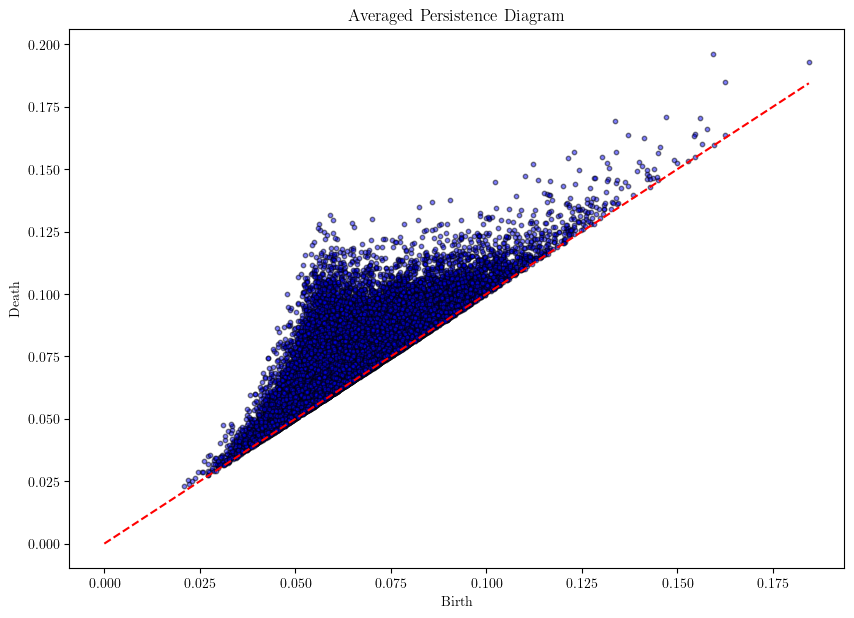

In [41]:
# Example function to generate point cloud data
def generate_synthetic_data(num_points=1000, noise=0.05):
    points = np.random.rand(num_points, 2) - 0.5
    points = np.hstack((points, np.zeros((num_points, 1))))  # Add a zero column for the third dimension
    points += noise * np.random.randn(*points.shape)
    return points

# Compute and average persistence diagrams
def compute_averaged_persistence_diagrams(num_datasets=10):
    all_diags = []
    
    for _ in range(num_datasets):
        points = generate_synthetic_data()
        rips_complex = gd.RipsComplex(points=points, max_edge_length=0.3)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        diag = simplex_tree.persistence()
        all_diags.append(diag)
    
    # Flatten and average persistence diagrams
    birth_death_pairs = []
    for diag in all_diags:
        for simplex, (birth, death) in diag:
            if simplex == 1:  # Considering only H1 features (loops)
                birth_death_pairs.append((birth, death))
    
    birth_death_pairs = np.array(birth_death_pairs)
    return birth_death_pairs

# Plot averaged persistence diagrams over different conditions
def plot_evolution(birth_death_pairs):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(birth_death_pairs[:, 0], birth_death_pairs[:, 1], alpha=0.5, c='blue', edgecolor='k', s=10)
    plt.plot([0, max(birth_death_pairs[:, 0])], [0, max(birth_death_pairs[:, 0])], 'r--')  # Diagonal line
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title('Averaged Persistence Diagram')
    plt.show()

# Generate averaged persistence diagrams
birth_death_pairs = compute_averaged_persistence_diagrams(num_datasets=50)

# Plot the evolution of topological descriptors
plot_evolution(birth_death_pairs)